In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.float_format = '{:.0f}'.format

In [168]:
data = pd.read_csv("./frauds_29T114226.557.csv", sep=';')
data.head(15)


,#nick,nip,email,"phone,,"
0,all_elektrocity,6462831307,allegro@elektrocity.eu,"608092396,,"
1,www_PL-GSM_pl,8952031414,sklep@pl-gsm.pl,",,"
2,smart_fon,8992746964,smartfon.allegro@gmail.com,"535468930,888599879,"
3,cell_world,8992746964,cell_world@onet.eu,"786249686,,"
4,MDM-KOM,7272801172,mdmkom@gmail.com,"502928871,,"
5,MULTISERW_RENOMA,8992794874,multiserwis_ch_renoma@interia.pl,"533254545,,"
6,KUBTEL_S,nan,meandmobileallegro@gmail.com,"509919099,530222477,"
7,gsmwroc,8992746964,wrocgsm@gmail.com,"507250780,,"
8,AKsklepGSM,6831919269,bejooaw@gmail.com,"796939594,,"
9,wroctel,nan,wroctel@gmail.com,"507250780,,"


In [169]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 4 columns):
#nick      579 non-null object
nip        174 non-null float64
email      484 non-null object
phone,,    580 non-null object
dtypes: float64(1), object(3)
memory usage: 18.2+ KB


In [170]:
top_users = data['#nick'].value_counts().head(5)

## Top 5 frauders on Allegro

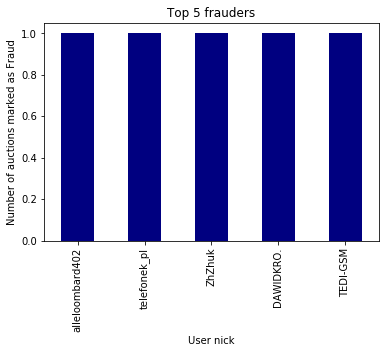

In [171]:
ax = top_users.plot.bar(title='Top 5 frauders', sort_columns=True, colormap='jet');
patches, labels = ax.get_legend_handles_labels();
ax.set_xlabel("User nick");
ax.set_ylabel("Number of auctions marked as Fraud");


In [176]:
 data.groupby(['nip','#nick']).count().head(10)

email  phone,,
nip        #nick                           
10751075   Free_For_All          0        1
157372452  First4Spares-PL       0        1
293271976  -AUTOMANIA-           1        1
1131286138 ToMeK_R00             1        1
1132463536 GCKrakow              1        1
           toughbook             1        1
1132792174 AgkInvest             1        1
1132831299 SinPro_pl             1        1
2530335927 alleloombard1206      0        1
5211965257 Rakoczy_Marcin        1        1

In [173]:
 data.groupby(['nip','#nick'])['#nick'].sum()

nip         #nick           
10751075    Free_For_All            Free_For_All
157372452   First4Spares-PL      First4Spares-PL
293271976   -AUTOMANIA-              -AUTOMANIA-
1131286138  ToMeK_R00                  ToMeK_R00
1132463536  GCKrakow                    GCKrakow
            toughbook                  toughbook
1132792174  AgkInvest                  AgkInvest
1132831299  SinPro_pl                  SinPro_pl
2530335927  alleloombard1206    alleloombard1206
5211965257  Rakoczy_Marcin        Rakoczy_Marcin
5213133414  2kroki_pl                  2kroki_pl
5213743526  i-lombard                  i-lombard
5242248114  astelefony                astelefony
5242685010  INTERLOMBARD-N51    INTERLOMBARD-N51
5471915256  sklep_fot_o              sklep_fot_o
5472142856  fkmarket                    fkmarket
5530019524  eldorado_lombard    eldorado_lombard
5532284874  logatero                    logatero
5541664056  telkomis_pl              telkomis_pl
5591455521  Ascom-CSW                  A

In [174]:
top_nips = data.groupby('nip')['#nick'].nunique()
nipz = pd.DataFrame({'nip':top_nips.index, 'count':top_nips.values})
sorted_nipz = nipz.sort_values(by=['count'], ascending=False)
sorted_nipz.head(10)
ts = pd.Series(sorted_nipz['count'].values.astype(int), index=sorted_nipz['nip'].astype(str)).head(10)

## Number of slippery users registered under the same NIP code

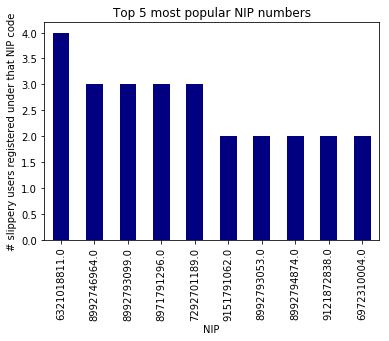

In [175]:
ax2 = ts.plot.bar(title='Top 5 most popular NIP numbers', colormap='jet');
patches2, labels2 = ax2.get_legend_handles_labels();
ax2.set_xlabel("NIP");
ax2.set_ylabel("# slippery users registered under that NIP code");
